# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

Chosen Data Set: censusData.csv

Prediction Target (Label): income (whether income exceeds $50K/year)

Problem Type:
Supervised learning (binary classification)
Predicts if an individual earns >$50K based on demographic/employment features

Features:
age, workclass, education, education-num, marital-status, occupation, relationship, race, sex, hours-per-week

Importance:
Enables targeted financial services (loan offers, investment advice), helps policymakers identify income disparity factors, and allows businesses to tailor marketing strategies for different income segments.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

Actual column names:
['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income_binary']

Using 'income_binary' as income column

Data Shape: (32561, 15)

Data Types:
 age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

Missing Values:
 age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-l

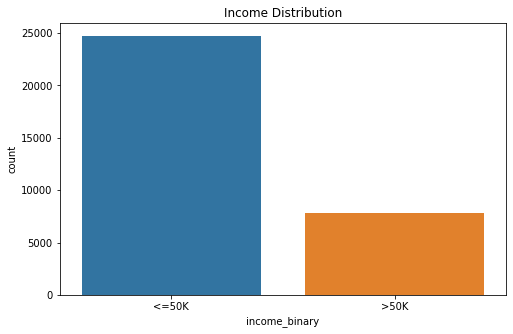

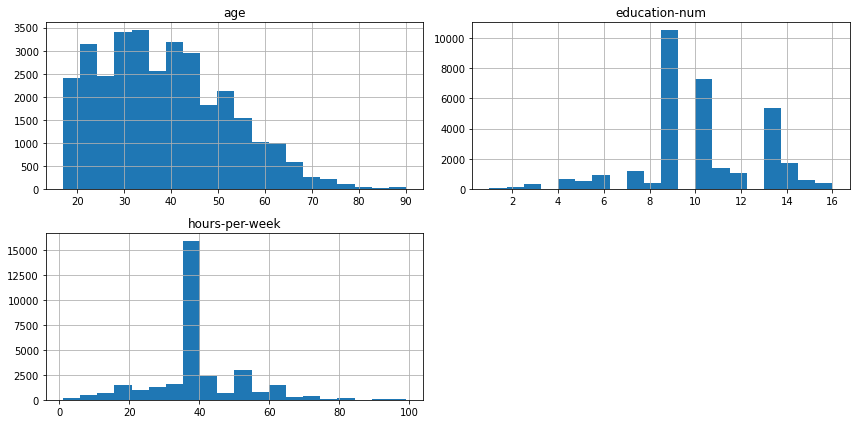

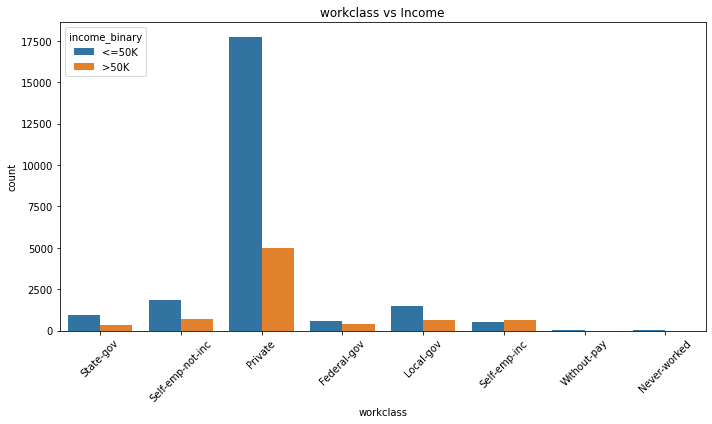

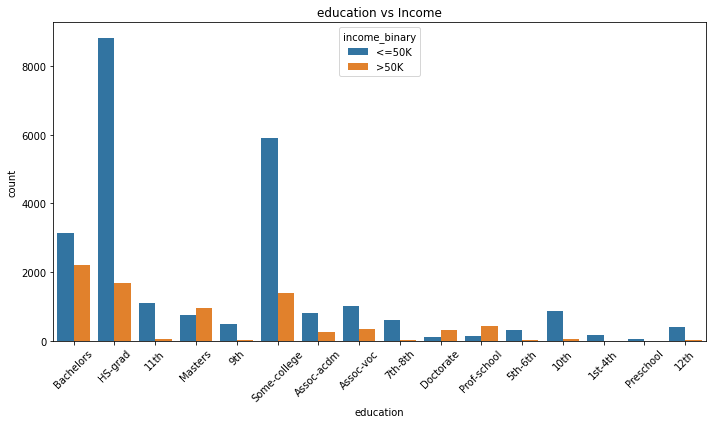

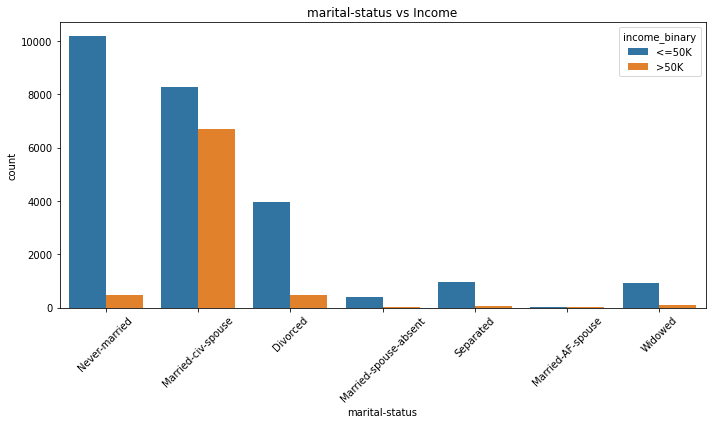

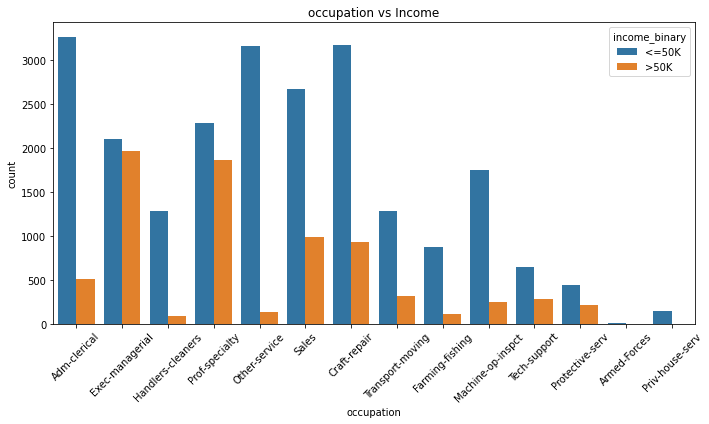

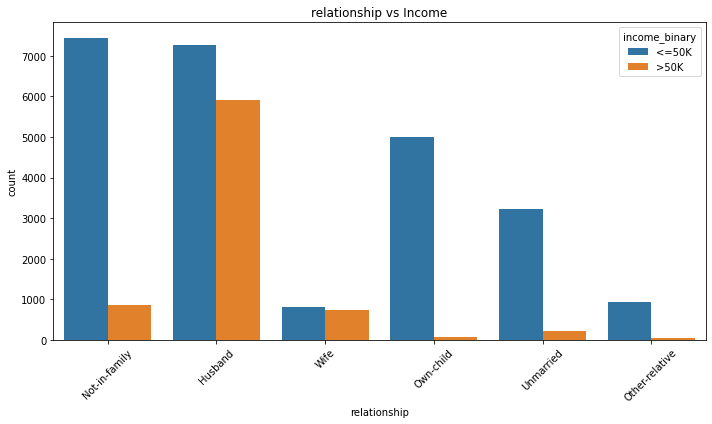

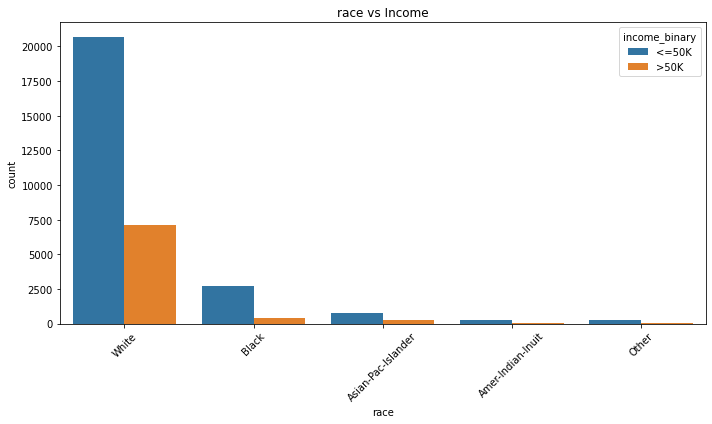

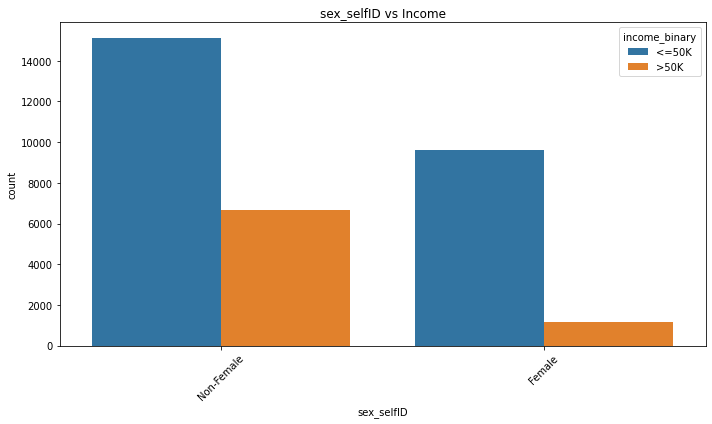


Handling missing values:
Initial missing values: 4749
Missing values after treatment: 0

Income distribution:
<=50K    0.75919
>50K     0.24081
Name: income_binary, dtype: float64


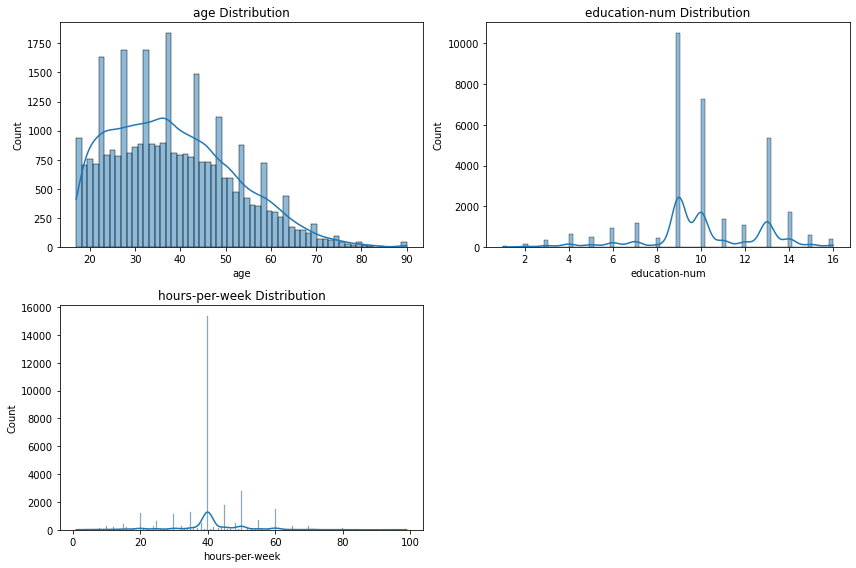

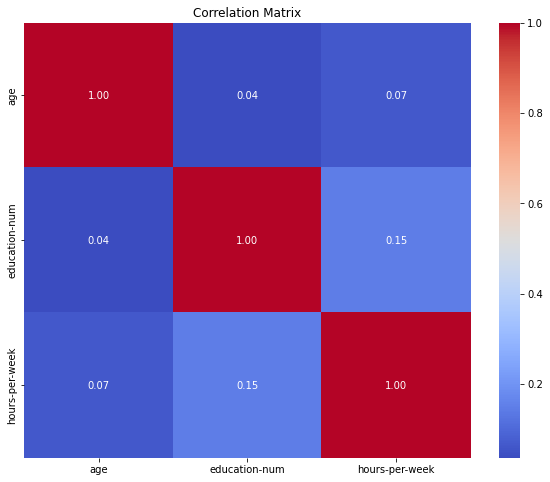

In [3]:
# Inspect the actual column names
print("Actual column names:")
print(df.columns.tolist())

# Find the correct income column name (case-insensitive)
income_col = [col for col in df.columns if 'income' in col.lower()]
if income_col:
    income_col = income_col[0]
    print(f"\nUsing '{income_col}' as income column\n")
else:
    raise ValueError("No income column found in dataset")

# Exploratory Data Analysis
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Visualize target distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=income_col, data=df)
plt.title('Income Distribution')
plt.show()

# Analyze numerical features
numerical = ['age', 'education-num', 'hours-per-week']
df[numerical].hist(bins=20, figsize=(12, 6))
plt.tight_layout()
plt.show()

# Check categorical features
categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID']

for col in categorical:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue=income_col, data=df)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Income')
    plt.tight_layout()
    plt.show()
    
# Handle missing values
print("\nHandling missing values:")
print(f"Initial missing values: {df.isnull().sum().sum()}")

# Fill numerical missing values with median
df['age'].fillna(df['age'].median(), inplace=True)
df['hours-per-week'].fillna(df['hours-per-week'].median(), inplace=True)

# Fill categorical missing values with mode
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)

print(f"Missing values after treatment: {df.isnull().sum().sum()}")

# Check income distribution
income_counts = df[income_col].value_counts(normalize=True)
print("\nIncome distribution:")
print(income_counts)

# Visualize numerical feature distributions
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

# Correlation analysis
plt.figure(figsize=(10, 8))
corr = df[numerical + [income_col]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

Revised Feature List:
- Keep: age, education-num, hours-per-week, workclass, education, marital-status, occupation,sex_selfID, relationship 
- Remove: fnlwgt (sampling weight, not predictive), native-country (too many missing values), capital-gain, capital-loss (sparse distributions), race (minimal predictive power in EDA)

Data Preparation Techniques:
1. Handle missing values: 
- Numerical: Impute age and hours-per-week with median
- Categorical: Impute workclass, occupation, and native-country with mode
2. Encode categoricals:
- One-hot encoding for workclass, marital-status, occupation
- Ordinal encoding for education (already has education-num)
- Binary encoding for sex_selfID
3. Address class imbalance: SMOTE oversampling
4. Feature scaling: StandardScaler for numerical features

Model Selection:
1. Primary: Random Forest (handles mixed data types well)
2. Baseline: Logistic Regression (simple, interpretable)
3. Alternative: Gradient Boosting (XGBoost for potential performance boost)

Validation & Improvement Plan:
1. Split: 70% train, 30% test
2. Evaluation metrics (due to imbalance):
- Primary: F1-score
- Secondary: Precision-Recall AUC
- Tertiary: Confusion matrix
3. Model improvement:
- Hyperparameter tuning via GridSearchCV
- Feature importance analysis
- Potential feature engineering (e.g., age groups)

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, f1_score, precision_recall_curve, auc, roc_auc_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

Initial Model Performance:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      7455
           1       0.61      0.58      0.59      2314

    accuracy                           0.81      9769
   macro avg       0.74      0.73      0.73      9769
weighted avg       0.81      0.81      0.81      9769

F1 Score: 0.592
ROC AUC: 0.854
Precision-Recall AUC: 0.627


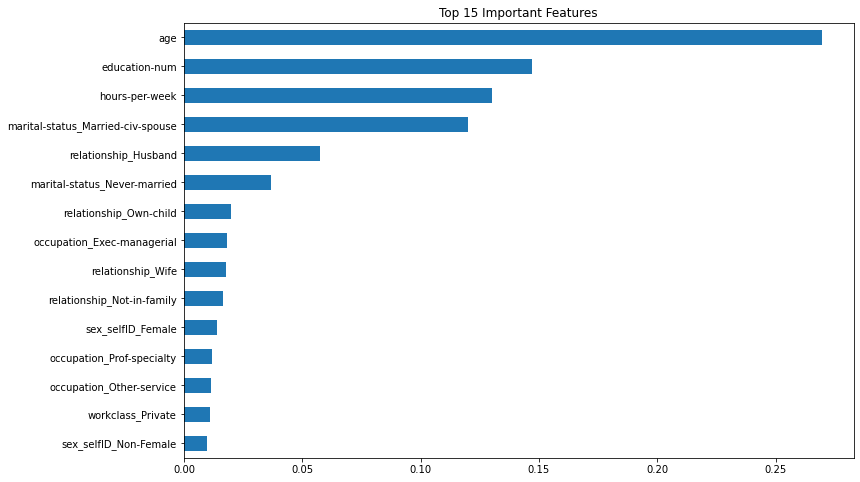

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   49.1s finished



Optimized Model Performance:
              precision    recall  f1-score   support

           0       0.92      0.84      0.87      7455
           1       0.59      0.75      0.66      2314

    accuracy                           0.82      9769
   macro avg       0.75      0.79      0.77      9769
weighted avg       0.84      0.82      0.82      9769

Optimized F1 Score: 0.660
Best Parameters: {'classifier__max_depth': 20, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}

Model Comparison:
Logistic Regression:
  F1 Score: 0.647
  ROC AUC: 0.883
Gradient Boosting:
  F1 Score: 0.634
  ROC AUC: 0.891


In [5]:
# Data Preparation
# Clean and prepare features
df_clean = df.copy()
df_clean['age'].fillna(df['age'].median(), inplace=True)
df_clean['hours-per-week'].fillna(df['hours-per-week'].median(), inplace=True)
df_clean['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df_clean['occupation'].fillna(df['occupation'].mode()[0], inplace=True)

# Define features and target
X = df_clean[['age', 'education-num', 'hours-per-week', 'workclass', 
              'education', 'marital-status', 'occupation', 'relationship', 'sex_selfID']]
y = df_clean['income_binary'].apply(lambda x: 1 if x == '>50K' else 0)

# Preprocessing pipeline
categorical_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'sex_selfID']
numerical_features = ['age', 'education-num', 'hours-per-week']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), categorical_features)
    ])

# Create pipeline 
# Using class_weight='balanced' to handle imbalance
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
pipeline.fit(X_train, y_train)

# Evaluate
y_pred = pipeline.predict(X_test)
print("Initial Model Performance:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, pipeline.predict_proba(X_test)[:,1]):.3f}")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.3f}")

# Feature Importance 
rf_model = pipeline.named_steps['classifier']
preprocessor = pipeline.named_steps['preprocessor']

# Get feature names from OneHotEncoder
cat_encoder = preprocessor.named_transformers_['cat']
try:
    cat_feature_names = cat_encoder.get_feature_names_out(categorical_features)
except AttributeError:
    cat_feature_names = []
    for i, col in enumerate(categorical_features):
        categories = cat_encoder.categories_[i]
        cat_feature_names.extend([f"{col}_{category}" for category in categories])

# Combine all feature names
feature_names = numerical_features + list(cat_feature_names)

plt.figure(figsize=(12, 8))
pd.Series(rf_model.feature_importances_, index=feature_names).sort_values().tail(15).plot(kind='barh')
plt.title('Top 15 Important Features')
plt.show()

# Model Improvement with Hyperparameter Tuning
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nOptimized Model Performance:")
print(classification_report(y_test, y_pred_best))
print(f"Optimized F1 Score: {f1_score(y_test, y_pred_best):.3f}")
print(f"Best Parameters: {grid_search.best_params_}")

# Compare with other models (using class_weight for imbalance)
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

print("\nModel Comparison:")
for name, model in models.items():
    # Create new pipeline for each model
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model_pipeline.predict_proba(X_test)[:,1])
    print(f"{name}:")
    print(f"  F1 Score: {f1:.3f}")
    print(f"  ROC AUC: {roc_auc:.3f}")